### Data Loading

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
data_fa = pd.read_excel("sdsu_dti.xlsx", sheet_name="FA")
data_ad= pd.read_excel("sdsu_dti.xlsx", sheet_name="AD")
data_md = pd.read_excel("sdsu_dti.xlsx", sheet_name="MD")
data_rd = pd.read_excel("sdsu_dti.xlsx", sheet_name="RD")

(data_fa.shape, data_ad.shape, data_md.shape, data_rd.shape)

((33, 51), (33, 51), (33, 51), (33, 51))

In [34]:
# Defining my features 

arr2 = pd.concat([data_ad , data_fa , data_md , data_rd]  , axis = 1 )
X = arr2.values


### Visualization? 

**Issue** How to visualise 200 Dimensional data?
- Reduce Dimensions: Use techniques like PCA or t-SNE to reduce dimensions.
- Plot Pairs: Create scatter plots for feature pairs to spot patterns.
- Heatmap: Display correlation matrix as a heatmap.
- Parallel Coordinates: Plot multiple features on parallel axes.
- Box Plots: Show feature distributions using box plots.
- Histograms: Display frequency distribution of individual features.
- Violin Plots: Combine box plots and kernel density plots.
- Feature Importance: Use bar plots to show feature importance.
- Interactive Tools: Utilize tools like Plotly for dynamic visualizations.


### K-Means clustering for Selecting features

First let's check the Silhouette Plot for multiple clsuter values.
But problem withit is that multiple features out of 200 columns could be just craeting a noise, decreasing the value of our true Silhouette pro hero.
So we'll try to take pairs of features, and then calculate the Silhouette score for each pair, for possible values of clusters, and find which combination of feature1 + feature2 + k_value is giving higher Silhouette score, and also visualize the distribution of the Silhouette score, to actually see how many of them are our true hero.

c:\Users\rishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

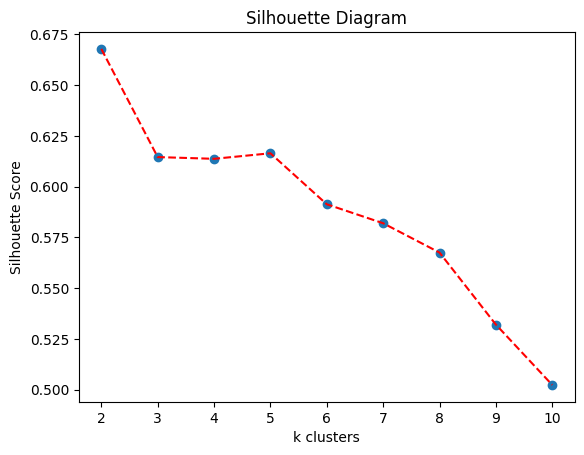

In [ ]:
# Selecting the optimum number of clusters 
from sklearn.metrics import silhouette_score 
from sklearn.cluster import KMeans 

lis = []
lis_num = []

for i in range(2,11) :
    kmeans1 = KMeans(n_clusters = i)
    kmeans1.fit(X)
    lis.append(silhouette_score(X, kmeans1.labels_))
    lis_num.append(i)
    
plt.plot(lis_num ,lis , "r--")
plt.scatter(lis_num, lis)
plt.xlabel("k clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Diagram")
plt.show()    

Optimum no. of clusters, where Silhouete scores maximum, seems to be 2 ,4 or 5. But, it can be lying, because there might be potential noisy features, just downgrading the score of a particular K.


In [91]:
import numpy as np 

out = -1 
max_list = []
distribution = []


for k in range(2 , 6) :
    for i  in range( 1, 200) :
        for j in range( i+1, 200) :
            
            f1 = X[ : , i : i+1] 
            f2 = X[ : , j : j+1]
            
            
            f0 = np.concatenate((f1 , f2) , axis=1 )
           
            kmeans2 = KMeans(n_clusters = k  , init = "random" , n_init = 3 )
            kmeans2.fit(f0) 
            distribution.append([out, i, j, k])
            # label = kmeans2.predict([[0.89 , 0.03]])
            #print(i," ", j," ", k , "silhouette score=" , silhouette_score( f0 , kmeans2.labels_))
            if(silhouette_score( f0 , kmeans2.labels_) > out ):
                out = silhouette_score( f0 , kmeans2.labels_)
                print(" ",i," ", j," ", k ,out)
                max_list.append((out, i, j, k))
    print(f"Len of dsitrbuiton till {k}-th cluster: ", len(distribution))

  1   2   2 0.5117991915238325
  1   3   2 0.5118444468789758
  1   4   2 0.5962377038698111
  1   51   2 0.6686832273995914
  2   3   2 0.7368644391034688
  3   5   2 0.7489903557122445
  3   77   2 0.761158952429249
  32   37   2 0.7754252929287997
  32   129   2 0.7914935190232847
  33   59   2 0.8085541009982
  38   59   2 0.8185944390166758
  38   130   2 0.8546473336752073
  125   130   2 0.8555535911609293
Len of dsitrbuiton till 2-th cluster:  19701
Len of dsitrbuiton till 3-th cluster:  39402
Len of dsitrbuiton till 4-th cluster:  59103
Len of dsitrbuiton till 5-th cluster:  78804


In [134]:
dist_np = np.array(distribution)
dist_np.shape

(78804, 4)

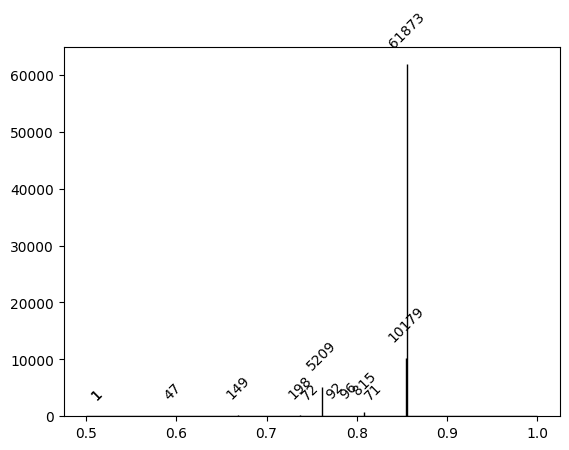

In [151]:
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(dist_np[:, 0], color='lightgreen', ec='black', bins=10000, range=[0.5, 1])

for i, (patch, frequency) in enumerate(zip(patches, n)):
    if frequency > 0:
        height = patch.get_height()
        plt.annotate(f'{int(frequency)}', xy=(patch.get_x() + patch.get_width() / 2, height),
                     xytext=(0, 10),rotation=45, textcoords='offset points',  # Increase the y-coordinate here
                     ha='center', va='bottom')
plt.show()


When setting the bin size (1-0.5)/10000 = 5e-05, we get above plot. It shows that we have 61873 such pairs, which is making Silhouette score near maximum

### K-means Clustering (Trial)

Let's get some visualizations, to get some insights.

In [ ]:
# K - Means Clusatering 

from sklearn.cluster import KMeans 
kmeans = KMeans (n_clusters = 5 , n_init = 3)
predict = kmeans.fit_predict(X1)

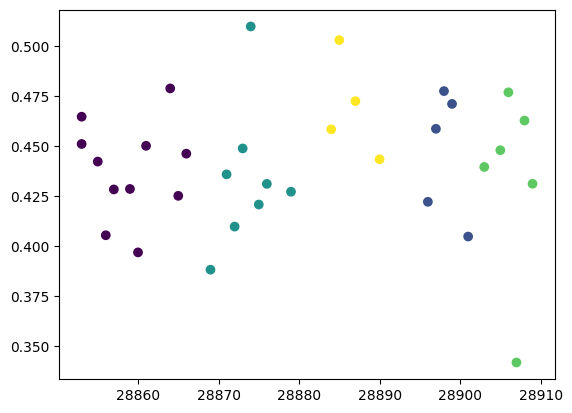

In [ ]:
plt.scatter( X[: 34 , 0] , X[:34 , 1] , c = predict[:34] , cmap = "viridis")
plt.show()

In [ ]:
#Since the Dataset is somewhat large = 33*50*4  , hence , we also tried taking results from Mini Batch K Means Clustering Algo.

from sklearn.cluster import MiniBatchKMeans 
mini_batch = MiniBatchKMeans (n_clusters = 5 , n_init = 3)
mini_batch.fit (X)

MiniBatchKMeans(n_clusters=5, n_init=3)

### Heirarchical Clustering - Agglomerative Clustering (Trial)

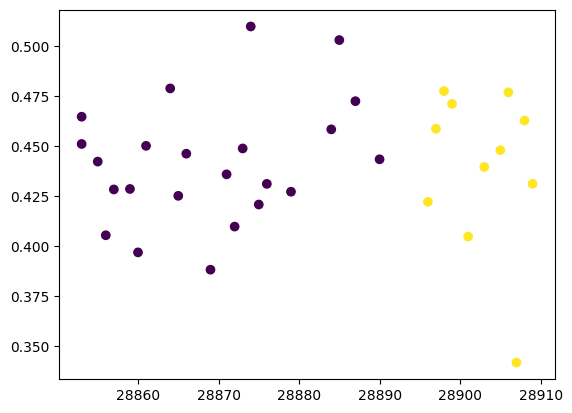

In [ ]:
# Heirarchichal Clustering 


# Agglomerative CLustering 

from sklearn.cluster import AgglomerativeClustering s

agg_cluster = AgglomerativeClustering()

labe = agg_cluster.fit_predict(X1)


# showing the clusters based on first 2 features of fa 

plt.scatter(X[:34 , 0] , X[ :34 , 1] , c= labe[:34] , cmap = "viridis" )
plt.show()
